# Tree Model 

# 의사결정트리(Decision Tree) 

### Graphviz
- dot language를 활용한 그래프를 그리기 위한 오픈소스 툴
#### 설치 
1. 다운로드 및 설치 
- 다운로드 https://graphviz.gitlab.io/download/ 
- 설치 시 path 설정 체크 
- 사용자 환경 변수 혹은 시스템 환경변수 설정 (제어판 - 시스템 - 고급시스템 설정)
 - 환경변수 - path - 편집 : C:\Program Files\Graphviz\bin
 - 시스템 변수 - path - 편집 : C:\Program Files\Graphviz\bin\dot.exe
2. pip install graphviz
- 오류나는 경우 anaconda prompt에서 설치(가상화 환경 밖에서 실행)

3. jupyter에서 확인 
- import graphviz as gv 


## Decision Tree Classifier ( 의사결정분류나무 )
-  종속변수(Class) : 범주형

### from sklearn import tree 
### from sklearn.tree import DecisionTreeClassifier

- crierion (str) : 정보량 계산 시 사용할 수식 (gini / entropy)
- max_depth (int) : 생성할 트리의 높이
- min_samples_split (int) : 분기를 수행하는 최소한의 데이터 수
- max_leaf_nodes (int) : 리프 노드가 가지고 있을 수 있는 최대 데이터 수
- random_state (int) : 내부적으로 사용되는 난수 값

In [1]:
## 라이브러리 임포트 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
## sklearn 모듈의 tree import
from sklearn import tree

# tree 시각화 
import graphviz as gv
from sklearn.tree import export_graphviz  
import os 

# 환경변수 추가 후 환경변수 설정 아래코드(아래 경로는 실제 설치된 경로 확인 )
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\' 

### 교제 사례 기준 트리 구성 확인  

In [3]:
### 테스트 데이터 생성    
# 성별 : 남(0), 여(1)
my_list1 = [
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1' ]
# 나이 
my_list2 = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
            50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
            50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
            30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
# 타겟 데이터, good/bad : good(0),bad(1)    
my_list3 = ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
            '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 
            '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1' ]
      
df_tree_t = pd.DataFrame({'성별': my_list1, 
                          '나이': my_list2, 
                          'good/bad': my_list3})

In [4]:
## 데이터 확인 
print(df_tree_t.shape)
print(df_tree_t.info())
df_tree_t.head(3)

(100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   성별        100 non-null    object
 1   나이        100 non-null    int64 
 2   good/bad  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


,성별,나이,good/bad
0,0,50,0
1,0,50,0
2,0,50,0


In [5]:
# 데이터 확인 
print(df_tree_t['good/bad'].groupby(df_tree_t['나이']).count())
print(df_tree_t.groupby(df_tree_t['good/bad']).count())

나이
30    50
50    50
Name: good/bad, dtype: int64
          성별  나이
good/bad        
0         50  50
1         50  50


## 지니지수

### 지니지수 - 나이 기준 

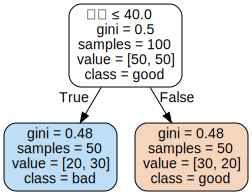

In [6]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t['나이'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 지니 지수 의사결정 트리 모델 피팅 
gini_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 3, random_state = 20 )               
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)    

# 시각화 
dot_data = tree.export_graphviz(gini_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['나이' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

### 지니지수 - 성별 기준 

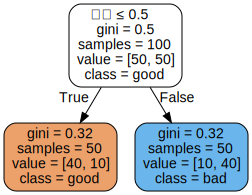

In [7]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t['성별'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 지니 지수 의사결정 트리 모델 피팅 
gini_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 3, random_state = 20)               
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)    

# 시각화 
dot_data = tree.export_graphviz(gini_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['성별' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

### 지니지수 - 분할 기준 확인  

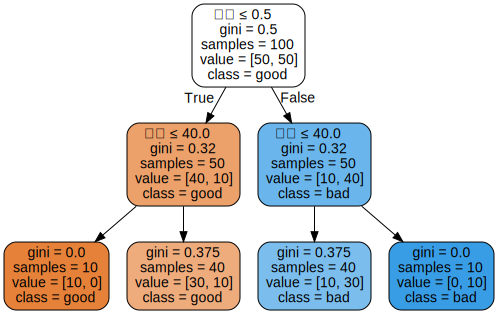

In [8]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t[['나이','성별']])
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 지니지수 의사결정 트리 모델 피팅 
gini_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 3, random_state = 20)               
gini_clf = gini_clf.fit(train_temp_X, train_temp_y)             # feature, target

# 시각화 
dot_data = tree.export_graphviz(gini_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['나이','성별' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

In [9]:
# Fitting된 모델로 x_valid를 통해 예측을 진행
y_pred_gini = gini_clf.predict(train_temp_X)

y_pred_e = gini_clf.predict(train_temp_X)
print('Accuracy: %.2f' % accuracy_score(train_temp_y, y_pred_e))

print(confusion_matrix(train_temp_y, y_pred_e))

# 속성 중요도 확인 
feature_importance = pd.DataFrame(gini_clf.feature_importances_.reshape((1, -1)),
                                  columns= [['나이','성별']], index=['feature_importance'])
feature_importance

Accuracy: 0.80
[[40 10]
 [10 40]]


,나이,성별
feature_importance,0.1,0.9


## 엔트로피 

### 엔트로피 - 나이기준 

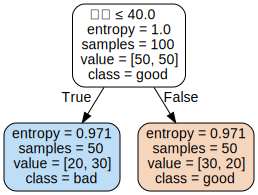

In [10]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t['나이'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 모델 피팅 
entropy_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 20)               
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)    

# 시각화 
import graphviz as gv
dot_data = tree.export_graphviz(entropy_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['나이' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

### 엔트로피 - 성별 기준 

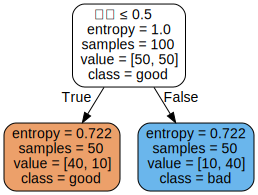

In [11]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t['성별'])
train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 모델 학습 
entropy_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 20)               
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)    

# 시각화 
import graphviz as gv
dot_data = tree.export_graphviz(entropy_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['성별' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

### 엔트로피 - 분할 기준 확인 

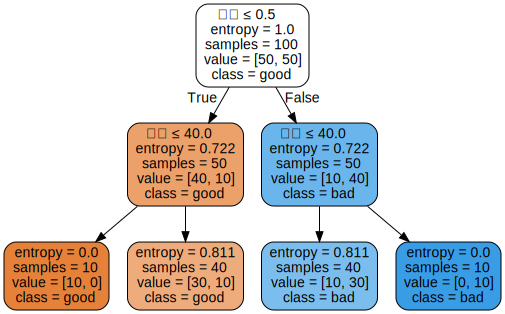

In [12]:
# 데이터 컨버전 
train_temp_X = np.array(df_tree_t[['나이','성별']])
# train_temp_X = train_temp_X.reshape(-1,1)
train_temp_y = np.array(df_tree_t['good/bad'])
train_temp_y = train_temp_y.reshape(-1,1)

# 모델 학습 
entropy_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 20)               
entropy_clf = entropy_clf.fit(train_temp_X, train_temp_y)             # feature, target

# 시각화 
import graphviz as gv
dot_data = tree.export_graphviz(entropy_clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = ['나이','성별' ],   # feature 이름
                               class_names = ['good','bad'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)              
graph

In [13]:
from sklearn.metrics import accuracy_score

y_pred_e = entropy_clf.predict(train_temp_X)
print('Accuracy: %.2f' % accuracy_score(train_temp_y, y_pred_e))

from sklearn.metrics import confusion_matrix
confusion_matrix(train_temp_y, y_pred_e)

## 트리 분기 과정의 중요도 확인 
input_impor = entropy_clf.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor, columns= [['나이','성별']], index=['feature_importance'])
feature_importance

Accuracy: 0.80


,나이,성별
feature_importance,0.207722,0.792278


In [14]:
entropy_clf.predict([[20, '1']])

array(['1'], dtype=object)

## load_breast_cancer 데이터 활용한 Tree Model

In [15]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data['data'] 

# 종양 : 양성(0), 악성(1) 여부 (target data)
b_target_data = data['target'] 

# 종양 구분 
tumar = data['target_names'] 

# 속성 명칭 
feature_names = data['feature_names'] 

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

# label 데이터 비율 확인 
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [16]:
## 학습 데이터 셋 생성 

# 평균관련 된 3개의 속성으로 종양 여부 판단 
model_feautre_name = ['mean_radius', 'mean_texture', 'mean_perimeter' ] 
X = breast_df[model_feautre_name]

Y = breast_df['target']

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30) 

In [17]:
## 스케일링 & 정규화 : 거리기반 알고리즘은 기본으로 표준화, 정규화 수행 필요 
from sklearn.preprocessing import StandardScaler

## 스케일링 & 정규화
scaler = StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

### 지니지수 의사결정나무 분류 

In [19]:
## 지니지수 의사결정나무 분류
from sklearn.tree import DecisionTreeClassifier

breast_clf_gini = DecisionTreeClassifier(criterion="gini", max_depth = 2, random_state = 30)               
breast_clf_gini = breast_clf_gini.fit(X_train_std, y_train) # feature, target

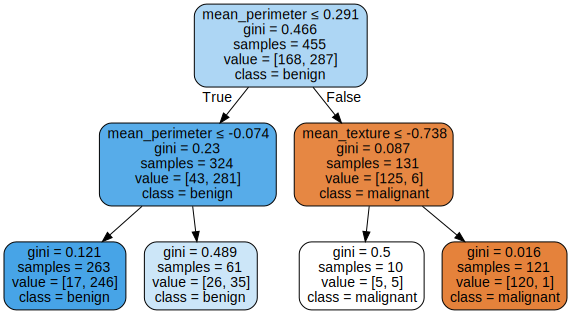

In [20]:
## 지니계수 의사결정나무 분류 시각화
# graphviz 설치 불가 한 경우 해당 라인 pass
import graphviz as gv
dot_data = tree.export_graphviz(breast_clf_gini,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = model_feautre_name,  # feature 이름
                               class_names = tumar,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = gv.Source(dot_data)
graph

## 이미지로 저장 
# gv.Source(dot_data).render('지니지수 의사결정나무 분류', format="png")

In [21]:
## 모델 성능 확인 
from sklearn.metrics import accuracy_score

y_pred_gini = breast_clf_gini.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_gini))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gini)

Accuracy: 0.89


array([[34, 10],
       [ 2, 68]], dtype=int64)

In [22]:
## 트리 분기 과정의 중요도 
input_impor_gini = breast_clf_gini.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_gini, columns=model_feautre_name, index=['feature_importance'])
feature_importance

,mean_radius,mean_texture,mean_perimeter
feature_importance,0.0,0.031168,0.968832


### 엔트로피 의사결정나무 분류 

In [23]:
## entropy 의사결정나무 분류 
# Information Gain - entropy
breast_clf_entropy = DecisionTreeClassifier(criterion = "entropy",  max_depth = 2, random_state = 30)  
breast_clf_entropy = breast_clf_entropy.fit(X_train_std, y_train) 

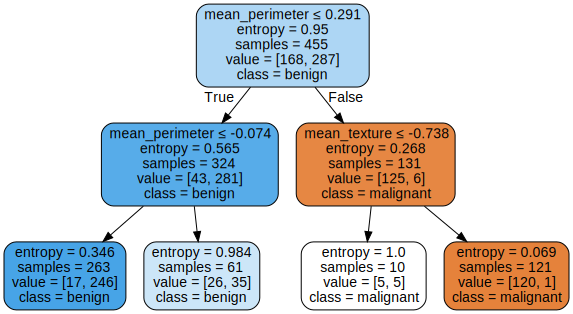

In [24]:
# 시각화
dot_data2 = tree.export_graphviz(breast_clf_entropy,        # 의사결정나무 모형 대입
                               out_file = None,     # file로 변환할 것인가
                               feature_names = model_feautre_name, # feature 이름
                               class_names = tumar,   # target 이름
                               filled = True,        # 그림에 색상을 넣을것인가
                               rounded = True,       # 반올림을 진행할 것인가
                               special_characters = True)    # 특수문자를 사용하나

graph2 = gv.Source(dot_data2)              
graph2

# ## 이미지로 저장 
# gv.Source(dot_data2).render('엔트로피 의사결정나무 분류', format="png")

In [25]:
from sklearn.metrics import accuracy_score

y_pred_cross = breast_clf_entropy.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_cross))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cross)

Accuracy: 0.89


array([[34, 10],
       [ 2, 68]], dtype=int64)

### [참조] 모델 개선 - cross validation 

In [26]:
## 모델 개선 - cross validation 
# cross-validation library
from sklearn.model_selection import cross_val_score

k_range = range(1,21) # k를 1~20까지 고려하여 최적의 k를 찾을 것
k_score = []          # 각 k들의 성능을 비교하기 위한 리스트생성

for i in k_range :
    # Information Gain - entropy
    breast_clf_entropy = DecisionTreeClassifier(criterion = "entropy",  max_depth = i, random_state = 30)  
     # 10-fold cross-validation
    scores = cross_val_score(breast_clf_entropy,X_train_std,y_train,cv=10,scoring = "accuracy")   
     # 10-fold 각각 정확도의 평균으로 성능계산 
    k_score.append(scores.mean())     

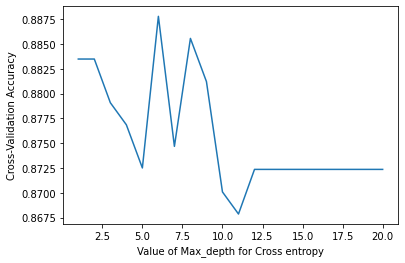

In [27]:
plt.plot(k_range, k_score)
plt.xlabel('Value of Max_depth for Cross entropy')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [28]:
## entropy 의사결정나무 분류 Cross validation 결과 적용 
# Information Gain - entropy

breast_tree_entropy = DecisionTreeClassifier(criterion = "entropy",  max_depth = 6, random_state = 30)  
breast_tree_entropy = breast_tree_entropy.fit(X_train_std, y_train)     

from sklearn.metrics import accuracy_score

y_pred_cross2 = breast_tree_entropy.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_cross2))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cross2)

Accuracy: 0.91


array([[39,  5],
       [ 5, 65]], dtype=int64)

In [29]:
## 트리 분기 과정의 중요도 
input_impor_entropy = breast_tree_entropy.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_entropy, columns=model_feautre_name, index=['feature_importance'])
feature_importance


,mean_radius,mean_texture,mean_perimeter
feature_importance,0.041175,0.185841,0.772984


## Decision regression Tree (의사결정회귀나무)

-  종속변수(Class) : 연속형

### from sklearn.tree import DecisionTreeRegressor
- criterion : mse, friedman_mse, mae(default=”mse”)
- max_depth (int) : 생성할 트리의 높이
- min_samples_split (int) : 분기를 수행하는 최소한의 데이터 수
- max_leaf_nodes (int) : 리프 노드가 가지고 있을 수 있는 최대 데이터 수
- random_state (int) : 내부적으로 사용되는 난수 값

In [30]:
from sklearn.datasets import load_boston

# Boston Housing Price (보스턴 주택 가격 데이터)
data_b = load_boston()
df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)
 

# medv target data 
df_b['MEDV'] = data_b.target
print(df_b.shape)
df_b.head(3)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [31]:
# 데이터 분할 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_b.data,
                                                            data_b.target, 
                                                            test_size=0.2, 
                                                            random_state=30)

### 전체 속성 사용

In [32]:
## 의사결정 회귀 모델 학습 
from sklearn.tree import DecisionTreeRegressor

D_regressor = DecisionTreeRegressor()
D_regressor = D_regressor.fit(X_train_b, y_train_b)

client = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

pred_house_price = D_regressor.predict(client)[0]

print("예측 결과: {0:.2f}".format(pred_house_price), "(No Feature Selection)")

예측 결과: 16.10 (No Feature Selection)


In [33]:
# 테스트셋 예측 
y_pred_d_r = D_regressor.predict(X_test_b)

# MSE, r2_score 
from sklearn.metrics import mean_squared_error, r2_score 
mse_r = mean_squared_error(y_test_b, y_pred_d_r)
print("MSE :", mse_r)

# RMSE
rmse = np.sqrt(mse_r)
print("RMSE:", rmse)

# 결졍 계수(score) 
print("R^2 score:", D_regressor.score(X_test_b, y_test_b))

r2_points = r2_score(y_test_b, y_pred_d_r)
print("R^2 score 계산:", r2_points)

MSE : 13.567941176470587
RMSE: 3.683468633838299
R^2 score: 0.7867307381077879
R^2 score 계산: 0.7867307381077879


In [34]:
## 트리 분기 과정의 중요도 
input_impor_D_all = D_regressor.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_D_all, columns=data_b.feature_names, index=['feature_importance'])
feature_importance

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
feature_importance,0.046294,0.001357,0.004232,0.000335,0.030767,0.574524,0.008506,0.086621,0.000239,0.011082,0.018895,0.00768,0.209468


### 3개 속성 사용 & 데이터 표준화

In [35]:
## 3개 속성 적용 

model_f_name_r = ['RM', 'LSTAT', 'PTRATIO']

data_etc = df_b[model_f_name_r]
from sklearn.preprocessing import StandardScaler
## 스케일링 & 정규화
scaler = StandardScaler()
data_sclar =scaler.fit_transform(data_etc)

X_train_b_e, X_test_b_e, y_train_b_e, y_test_b_e = train_test_split(data_sclar, 
                                                                    data_b.target, 
                                                                    test_size=0.2, 
                                                                    random_state=30)

In [36]:
# data_b.target

In [37]:
# 모델 학습 
D_e_regressor = DecisionTreeRegressor(max_depth=3)
D_e_regressor = D_e_regressor.fit(X_train_b_e, y_train_b_e)

# 특정 값으로 예측 값 확인 
client = [[5.6090, 12.13, 20.20]]

pred_house_price = D_e_regressor.predict(client)[0]

print("Predicted value of client's home: {0:.2f}".format(pred_house_price), "(No Feature Selection)")

Predicted value of client's home: 21.90 (No Feature Selection)


In [38]:
# 테스트셋 예측 
y_pred_d_r_b_e = D_e_regressor.predict(X_test_b_e)

# MSE, r2_score 
from sklearn.metrics import mean_squared_error, r2_score 
mse_r = mean_squared_error(y_test_b_e, y_pred_d_r_b_e)
print("MSE:", mse_r)

# RMSE
rmse = np.sqrt(mse_r)
print("RMSE:", rmse)

# 결졍 계수(score) 
print("R^2:", D_e_regressor.score(X_test_b_e, y_test_b_e))

r2_points = r2_score(y_test_b_e, y_pred_d_r_b_e)
print("R^2 계산:", r2_points)

MSE: 13.788127575303598
RMSE: 3.7132368057132576
R^2: 0.7832697125809928
R^2 계산: 0.7832697125809928


In [39]:

## 트리 분기 과정의 중요도 
input_impor_D_all = D_e_regressor.feature_importances_.reshape((1, -1))
                                                       
feature_importance = pd.DataFrame(input_impor_D_all, 
                                  columns=model_f_name_r, 
                                  index=['feature_importance'])
feature_importance

,RM,LSTAT,PTRATIO
feature_importance,0.682206,0.317794,0.0


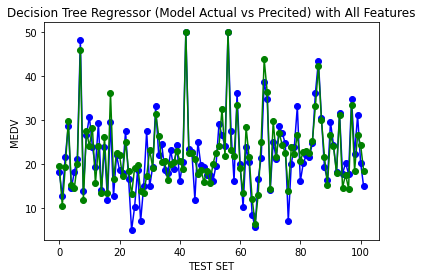

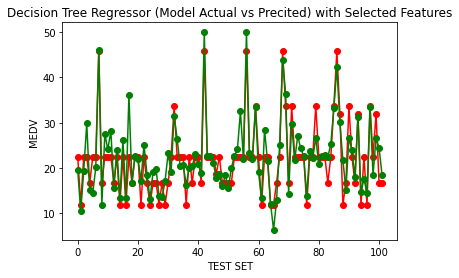

In [40]:
## 전체 속성 사용과 3개 속성 사용 잔차 비교 시각화 

## 전체 속성 사용 
y_pred_d_r = D_regressor.predict(X_test_b)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('TEST SET')
plt.ylabel('MEDV')
plt.plot(y_pred_d_r, 'o-', color="b", label="Predicted MEDV")
plt.plot(y_test_b, 'o-', color="g", label="Actual MEDV")

## 3개 속성 사용 
y_pred_f_e = D_e_regressor.predict(X_test_b_e)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with Selected Features")
plt.xlabel('TEST SET')
plt.ylabel('MEDV')
plt.plot(y_pred_f_e, 'o-', color="r", label="Predicted MEDV")
plt.plot(y_test_b_e, 'o-', color="g", label="Actual MEDV")

In [41]:
# tumar

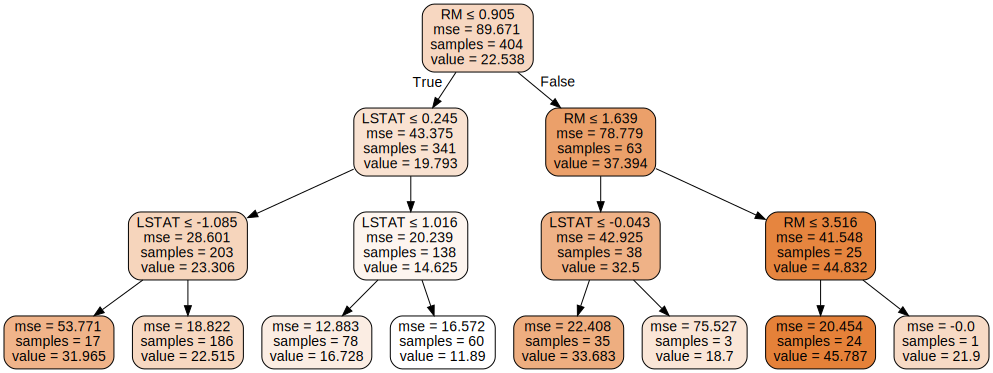

In [43]:
# 의사결정 나무 회귀, 3개 속성 시각화
dot_data3 = tree.export_graphviz(D_e_regressor,        # 의사결정나무 모형 대입
                               out_file = None,     # file로 변환할 것인가
                               feature_names = model_f_name_r, # feature 이름
                               filled = True,        # 그림에 색상을 넣을것인가
                               rounded = True,       # 반올림을 진행할 것인가
                               special_characters = True)    # 특수문자를 사용하나

graph3 = gv.Source(dot_data3)              
graph3

## 이미지로 저장 
# gv.Source(dot_data3).render('의사결정나무 회귀', format="png")